# Practice Session 1: Importance of Data Visualization

In today’s session, we will explore one of the most famous examples in data analysis - **Anscombe’s Quartet**.  
This dataset was created by the statistician **Francis Anscombe** in **1973** to demonstrate the importance of **visualizing data** before drawing conclusions.

Anscombe designed **four small datasets** that appear nearly identical when summarized numerically, yet look dramatically different when plotted.\
His intention was to show that simple descriptive statistics (like means or correlations) can never replace visual inspection and critical reasoning.

You can read more about the story and its modern extensions (including the playful *Datasaurus Dozen*) here:  
[Anscombe’s Quartet and the Datasaurus Dozen – Towards Data Science](https://towardsdatascience.com/water-cooler-small-talk-ep-7-anscombes-quartet-and-the-datasaurus-09a143400320/)

To start, let’s first load the *Anscombe* dataset from the `seaborn` library.

In [1]:
import seaborn as sns

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

Before calculating any summary statistics, let’s first confirm that this dataset actually consists of four separate datasets, and check how many data points each one contains.

In [2]:
# IDs of datasets
df.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [3]:
# Number of data points in each dataset
df.groupby('dataset').size()

dataset
I      11
II     11
III    11
IV     11
dtype: int64

Let’s calculate the mean, variance, and standard deviation for x and y across all four datasets.

In [4]:
# Summary stats for x and y by dataset
summary = (
    df.groupby("dataset")[["x", "y"]]
      .agg(["mean", "var", "std"])
      .round(3)
)
summary


x                   y              
        mean   var    std   mean    var    std
dataset                                       
I        9.0  11.0  3.317  7.501  4.127  2.032
II       9.0  11.0  3.317  7.501  4.128  2.032
III      9.0  11.0  3.317  7.500  4.123  2.030
IV       9.0  11.0  3.317  7.501  4.123  2.031

> *Note:*
> The `.agg()` method allows you to apply one or several aggregation functions to one or more columns at once.\
> You can pass them as a: 
> - list (`["mean", "var", "std"]`) or
> - as a dictionary specifying different functions for each column, e.g.:
> `df.agg({"x": ["mean", "std"], "y": ["mean", "std"]})`

Now, let’s extend our summary by also including the **median**, **minimum**, and **maximum** values.  
This gives us a more complete picture of how the values are distributed within each dataset.

In [5]:
summary = (
    df.groupby("dataset")[["x", "y"]]
      .agg(["mean", "var", "std", "median", "min", "max"])
      .round(3)
)
summary

x                                     y                             \
        mean   var    std median  min   max   mean    var    std median   min   
dataset                                                                         
I        9.0  11.0  3.317    9.0  4.0  14.0  7.501  4.127  2.032   7.58  4.26   
II       9.0  11.0  3.317    9.0  4.0  14.0  7.501  4.128  2.032   8.14  3.10   
III      9.0  11.0  3.317    9.0  4.0  14.0  7.500  4.123  2.030   7.11  5.39   
IV       9.0  11.0  3.317    8.0  8.0  19.0  7.501  4.123  2.031   7.04  5.25   

                
           max  
dataset         
I        10.84  
II        9.26  
III      12.74  
IV       12.50

Now it’s time to visualize the data.

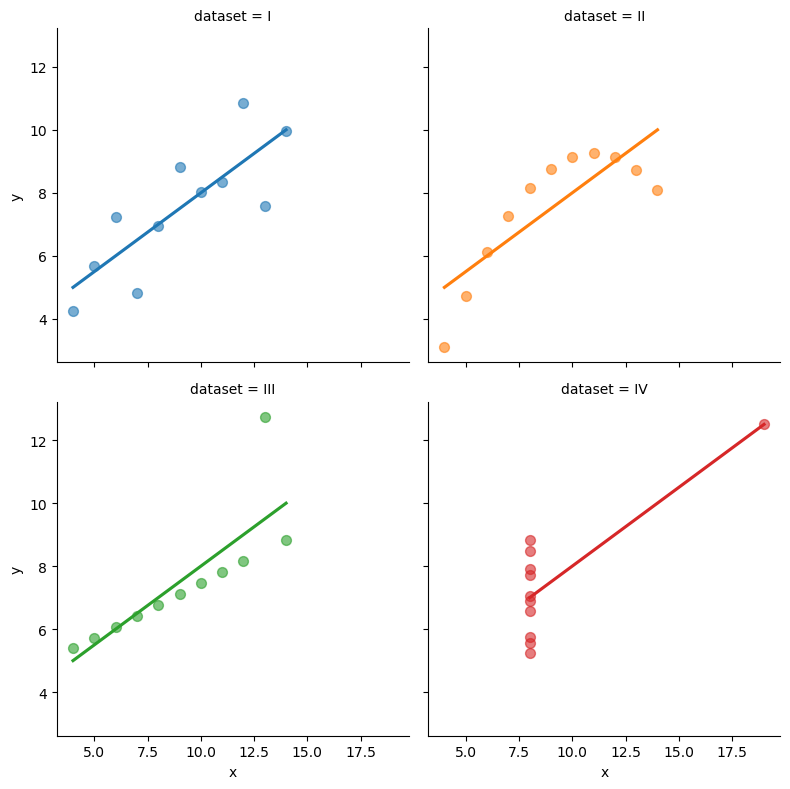

In [6]:
# Create a simple scatterplot with a linear fit for each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 0.6}
)

> *Note:*\
> `sns.lmplot()` combines a scatter plot with an optional regression line (by default, it's linear).\
> It automatically creates one small plot (facet) per dataset, making comparisons easy.

We can take this visualization one step further by adding **mean** and **median** reference lines.  
These help us see where the data points are centered and how they are spread both horizontally and vertically.

This makes the comparison between the four datasets even clearer and highlights that,  
although their numerical summaries are similar, their patterns differ substantially.

TypeError: 'NoneType' object is not callable

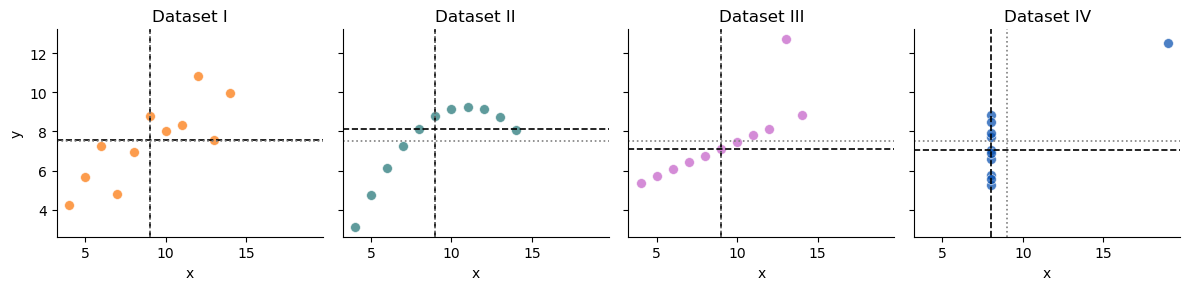

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Custom colors per dataset
colors = {"I": "#fc7202", "II": "#1b7173", "III": "#c25bc7", "IV": "#004aad"}

# Facet grid (with hue for colors)
g = sns.FacetGrid(df, col="dataset", hue="dataset", palette=colors, margin_titles=True)
g.map_dataframe(sns.scatterplot, x="x", y="y", alpha=0.7, s=50, legend=False)

# Add median/mean lines for each facet
for ax, (name, subset) in zip(g.axes.flat, df.groupby("dataset")):
    ax.axvline(subset["x"].median(), color="black", linestyle="--", linewidth=1.2)  # Median (x)
    ax.axvline(subset["x"].mean(),   color="gray",  linestyle=":",  linewidth=1.2)  # Mean (x)
    ax.axhline(subset["y"].median(), color="black", linestyle="--", linewidth=1.2)  # Median (y)
    ax.axhline(subset["y"].mean(),   color="gray",  linestyle=":",  linewidth=1.2)  # Mean (y)
    ax.set_title(f"Dataset {name}")

for ax in g.axes.flat:
    leg = ax.get_legend()
    if leg:
        leg.remove()

line_handles = [
    Line2D([0], [0], color="black", linestyle="--", label="Median"),
    Line2D([0], [0], color="gray",  linestyle=":",  label="Mean"),
]
g.legend(handles=line_handles, loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0), title="Reference Lines")

plt.show()
